# Hackathon Deets Digital 

![](https://i.imgur.com/QLKrhs7.png)

## <font color=	#68228B>Problem Statement <font>
- Predit Future defaulter by analysing the attributes

# Task we have performed:
1. Data Ingestion
2. Check Duplicate Values
3. Segregate numerical and Categorical features
4. Univariate Analysis
5. Handle the null values
6. Mulivariate analysis
	- Heatmap of correlation
7. Questions:
	- How many accounts are Defaulters
	- List of ACC_numbers that are defaulters
	- What is the balance in defauter's Accounts
	- What is the Date of birth of defaulters
8. Check and handle the outliers
9. List of Top 10 Features with their importance value
10. Split the train data and test data `Train Test Split`
11. Model Training `Logitic Regression`
12. Standadizing 
13. Prediction
14. Accuracy
15. Classification Report
16. Performance Metrix
	- Precision
	- Recall
	- F1-Score
	- Area Under Curve `AUC`

## Import required libraries

In [1]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest,chi2

### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

### To save the model
import pickle

## Data Ingestion

In [2]:
df = pd.read_excel(r"C:\Users\M G ENGINEERING\Downloads\Hackthon Train Data.xlsx")
df

,ACCT_NUMBER,BALANCE,SANCTIONAMOUNT,COLLATERALTYPE,COLLATERALVALUE,CREDITLIMIT,DATECLOSED,DATEOPENED,HIGHCREDIT,INSTALLMENTAMOUNT,PASTDUEAMOUNT,REPAYMENTTENURE,TERMFREQUENCY,SELF_TRADE,SECTOR,DOB,Defaulter
0,1024,0.0,50000,NaN,0.0,0.0,2021-09-04,2019-11-29,50000.0,1195.0,0.0,52.0,Bi-weekly,N,NBFC,1971-01-01,0
1,1025,71704.0,80000,NaN,0.0,0.0,NaT,2021-09-04,80000.0,4146.0,0.0,24.0,Monthly,N,NBFC,1971-01-01,0
2,1026,0.0,15000,NaN,NaN,NaN,2014-12-16,2014-01-03,NaN,358.0,0.0,NaN,Monthly,NaN,NaN,1988-05-10,0
3,1027,0.0,20000,NaN,NaN,NaN,2018-02-15,2017-03-15,NaN,907.0,NaN,NaN,Bi-weekly,NaN,NaN,1988-05-10,0
4,1028,21795.0,21795,NaN,NaN,NaN,NaT,2021-08-15,NaN,NaN,0.0,NaN,Monthly,NaN,NaN,1978-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10670,11694,4810.0,30000,NaN,NaN,NaN,NaT,2019-02-18,NaN,1650.0,4950.0,NaN,Monthly,NaN,NaN,1989-01-01,1
10671,11695,43346.0,50000,NaN,NaN,NaN,NaT,2020-01-27,NaN,1800.0,2100.0,NaN,Monthly,NaN,NaN,1989-01-01,1
10672,11696,16524.0,30000,NaN,NaN,NaN,NaT,2020-02-13,NaN,1500.0,10210.0,NaN,Other,NaN,NaN,1989-01-01,1
10673,11697,1648.0,30000,NaN,NaN,NaN,NaT,2019-02-18,NaN,1650.0,1650.0,NaN,Monthly,NaN,NaN,1977-01-01,1


In [3]:
df.shape

(10675, 17)

We have 10675 records and 17 features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10675 entries, 0 to 10674
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ACCT_NUMBER        10675 non-null  int64         
 1   BALANCE            10551 non-null  float64       
 2   SANCTIONAMOUNT     10675 non-null  int64         
 3   COLLATERALTYPE     868 non-null    float64       
 4   COLLATERALVALUE    6245 non-null   float64       
 5   CREDITLIMIT        6245 non-null   float64       
 6   DATECLOSED         4573 non-null   datetime64[ns]
 7   DATEOPENED         10666 non-null  datetime64[ns]
 8   HIGHCREDIT         6245 non-null   float64       
 9   INSTALLMENTAMOUNT  10169 non-null  float64       
 10  PASTDUEAMOUNT      10240 non-null  float64       
 11  REPAYMENTTENURE    2691 non-null   float64       
 12  TERMFREQUENCY      6994 non-null   object        
 13  SELF_TRADE         6245 non-null   object        
 14  SECTOR

## <font color=	#68228B>Info from the dataset<font>
1. The dataset has 15 independent features and 1 dependent feature (Defaulter)
2. Only Acc_number, Sanctionamount, DOB, Defaulter have complete records, rest all features have null values 

In [5]:
round(df.describe().T,3)

,count,mean,std,min,25%,50%,75%,max
ACCT_NUMBER,10675.0,6361.000,3081.751,1024.0,3692.5,6361.0,9029.5,11698.0
BALANCE,10551.0,51869.537,156534.752,-694111.0,0.0,3417.0,34375.0,2834639.0
SANCTIONAMOUNT,10675.0,207586.186,1799926.002,0.0,15124.0,30000.0,68630.0,28022020.0
COLLATERALTYPE,868.0,1.229,0.517,1.0,1.0,1.0,1.0,4.0
COLLATERALVALUE,6245.0,89999.246,1012371.261,0.0,0.0,0.0,0.0,74000000.0
CREDITLIMIT,6245.0,2114.777,28547.775,0.0,0.0,0.0,0.0,1850000.0
HIGHCREDIT,6245.0,335662.250,2344883.784,0.0,20000.0,50000.0,156472.0,28022020.0
INSTALLMENTAMOUNT,10169.0,2701.595,32922.804,0.0,0.0,600.0,1910.0,1980579.0
PASTDUEAMOUNT,10240.0,5565.070,43013.834,0.0,0.0,0.0,0.0,2543111.0
REPAYMENTTENURE,2691.0,47.781,50.264,1.0,12.0,30.0,60.0,502.0


## Check if there is any duplicate value

In [6]:
df.duplicated().sum() # No duplicate value

0

## Convert Bi-weekly to Bi_weekly 

In [7]:
df['TERMFREQUENCY'].replace("Bi-weekly",'Bi_weekly',inplace = True)

## Segregate numerical and categorical features

In [8]:
num_features = [fea for fea in df.columns if df[fea].dtypes != "O"]
num_features

['ACCT_NUMBER',
 'BALANCE',
 'SANCTIONAMOUNT',
 'COLLATERALTYPE',
 'COLLATERALVALUE',
 'CREDITLIMIT',
 'DATECLOSED',
 'DATEOPENED',
 'HIGHCREDIT',
 'INSTALLMENTAMOUNT',
 'PASTDUEAMOUNT',
 'REPAYMENTTENURE',
 'DOB',
 'Defaulter']

In [9]:
categorical_features = [fea for fea in df.columns if df[fea].dtypes == "O"]
categorical_features

['TERMFREQUENCY', 'SELF_TRADE', 'SECTOR']

## Univariate analysis

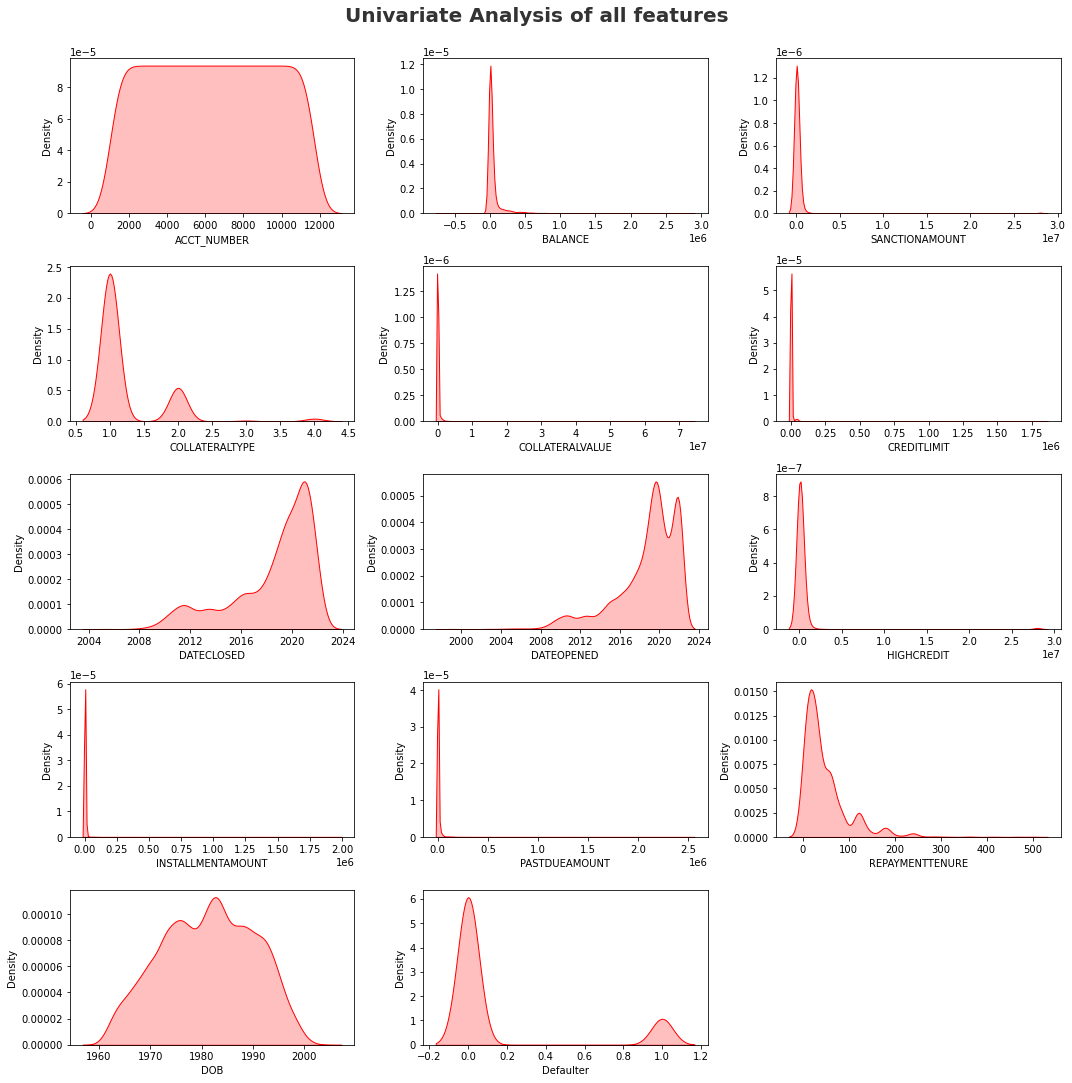

In [10]:
plt.figure(figsize = (15,15))
plt.suptitle('Univariate Analysis of all features', fontsize = 20, fontweight = "bold", alpha = 0.8, y = 1.)

for i in range(0, len(num_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(df[num_features[i]], shade =True, color='r')
    plt.xlabel(num_features[i])
    plt.tight_layout()

## Check the null values

In [11]:
df.isna().sum()

ACCT_NUMBER             0
BALANCE               124
SANCTIONAMOUNT          0
COLLATERALTYPE       9807
COLLATERALVALUE      4430
CREDITLIMIT          4430
DATECLOSED           6102
DATEOPENED              9
HIGHCREDIT           4430
INSTALLMENTAMOUNT     506
PASTDUEAMOUNT         435
REPAYMENTTENURE      7984
TERMFREQUENCY        3681
SELF_TRADE           4430
SECTOR               4430
DOB                     0
Defaulter               0
dtype: int64

In [12]:
# check null value in BALANCE Feature
df[df['BALANCE'].isna()]

,ACCT_NUMBER,BALANCE,SANCTIONAMOUNT,COLLATERALTYPE,COLLATERALVALUE,CREDITLIMIT,DATECLOSED,DATEOPENED,HIGHCREDIT,INSTALLMENTAMOUNT,PASTDUEAMOUNT,REPAYMENTTENURE,TERMFREQUENCY,SELF_TRADE,SECTOR,DOB,Defaulter
138,1162,NaN,15000,NaN,NaN,NaN,2016-03-31,2015-03-28,NaN,NaN,NaN,NaN,Other,NaN,NaN,1978-01-01,0
405,1429,NaN,1772,NaN,NaN,NaN,2014-12-03,2014-06-11,NaN,74.0,NaN,NaN,Weekly,NaN,NaN,1986-01-01,0
802,1826,NaN,15000,NaN,NaN,NaN,2016-02-24,2015-02-24,NaN,NaN,NaN,NaN,Other,NaN,NaN,1985-01-01,0
1095,2119,NaN,15000,NaN,NaN,NaN,2015-10-15,2014-10-18,NaN,NaN,NaN,NaN,Other,NaN,NaN,1974-01-01,0
1199,2223,NaN,15000,NaN,NaN,NaN,2016-03-18,2015-03-21,NaN,NaN,NaN,NaN,Other,NaN,NaN,1967-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10493,11517,NaN,14959,NaN,NaN,NaN,2016-04-01,2015-04-17,NaN,335.0,NaN,NaN,Weekly,NaN,NaN,1984-01-28,1
10494,11518,NaN,2022,NaN,NaN,NaN,2016-01-29,2015-08-07,NaN,84.0,NaN,NaN,Weekly,NaN,NaN,1984-01-28,1
10584,11608,NaN,9049,NaN,NaN,NaN,2021-03-07,2020-03-07,NaN,380.0,0.0,NaN,Weekly,NaN,NaN,1982-01-01,1
10638,11662,NaN,40000,NaN,NaN,NaN,2021-09-16,2020-08-04,NaN,910.0,NaN,NaN,Weekly,NaN,NaN,1995-01-01,1


In [13]:
df[df['BALANCE'].isna()].index

Int64Index([  138,   405,   802,  1095,  1199,  1241,  1406,  1833,  2396,
             2441,
            ...
            10129, 10130, 10132, 10133, 10266, 10493, 10494, 10584, 10638,
            10652],
           dtype='int64', length=124)

We will drop these indexes from the dataset because it shows null value in all important features

## Drop BALANCE Features which has null values

In [14]:
df.drop(df[df['BALANCE'].isna()].index, axis = 0, inplace = True)

## Replace null values of PASTDUEAMOUNT
we have to replace null values of PASTDUEAMOUNT with median , because from the univariant analysis we have seen that distribution of PASTDUEAMOUNT is right skewed

In [15]:
df["PASTDUEAMOUNT"].fillna(df['PASTDUEAMOUNT'].median(),inplace = True)

In [16]:
df['PASTDUEAMOUNT'].isna().sum()

0

## Remove null values of numercial data

In [17]:

df['INSTALLMENTAMOUNT'].fillna(df['INSTALLMENTAMOUNT'].median(),inplace = True)
df['COLLATERALTYPE'].fillna(df['COLLATERALTYPE'].median(),inplace = True)
df['CREDITLIMIT'].fillna(df['CREDITLIMIT'].median(),inplace = True)

## for DATECLOSED we will replace null value with mode
df['DATECLOSED'].fillna(df['DATECLOSED'].mode()[0],inplace = True)
df['DATEOPENED'].fillna(df['DATEOPENED'].mode()[0],inplace = True)
df['REPAYMENTTENURE'].fillna(df['REPAYMENTTENURE'].mode()[0],inplace = True)

df['HIGHCREDIT'].fillna(df['HIGHCREDIT'].median(),inplace = True)

In [18]:
df['COLLATERALVALUE'].fillna(df['COLLATERALVALUE'].median(),inplace = True) 

## Remove null values of categorical data

In [19]:
df.TERMFREQUENCY.value_counts()

Monthly         4346
Weekly          1083
Other            795
Bi_weekly        622
Quarterly         13
Bimonthly         10
Semiannually       1
Name: TERMFREQUENCY, dtype: int64

In [20]:
df.SECTOR.value_counts()

BANKS       3172
NBFC        2659
MORTGAGE     372
OTHER         42
Name: SECTOR, dtype: int64

In [21]:
df['TERMFREQUENCY'].fillna(df['TERMFREQUENCY'].mode()[0],inplace = True)
df['SELF_TRADE'].fillna(df['SELF_TRADE'].mode()[0],inplace = True)
df['SECTOR'].fillna(df['SECTOR'].mode()[0],inplace = True)

## All null values are removed

In [22]:
df.isna().sum()

ACCT_NUMBER          0
BALANCE              0
SANCTIONAMOUNT       0
COLLATERALTYPE       0
COLLATERALVALUE      0
CREDITLIMIT          0
DATECLOSED           0
DATEOPENED           0
HIGHCREDIT           0
INSTALLMENTAMOUNT    0
PASTDUEAMOUNT        0
REPAYMENTTENURE      0
TERMFREQUENCY        0
SELF_TRADE           0
SECTOR               0
DOB                  0
Defaulter            0
dtype: int64

In [23]:
# Now see the distribution of the data

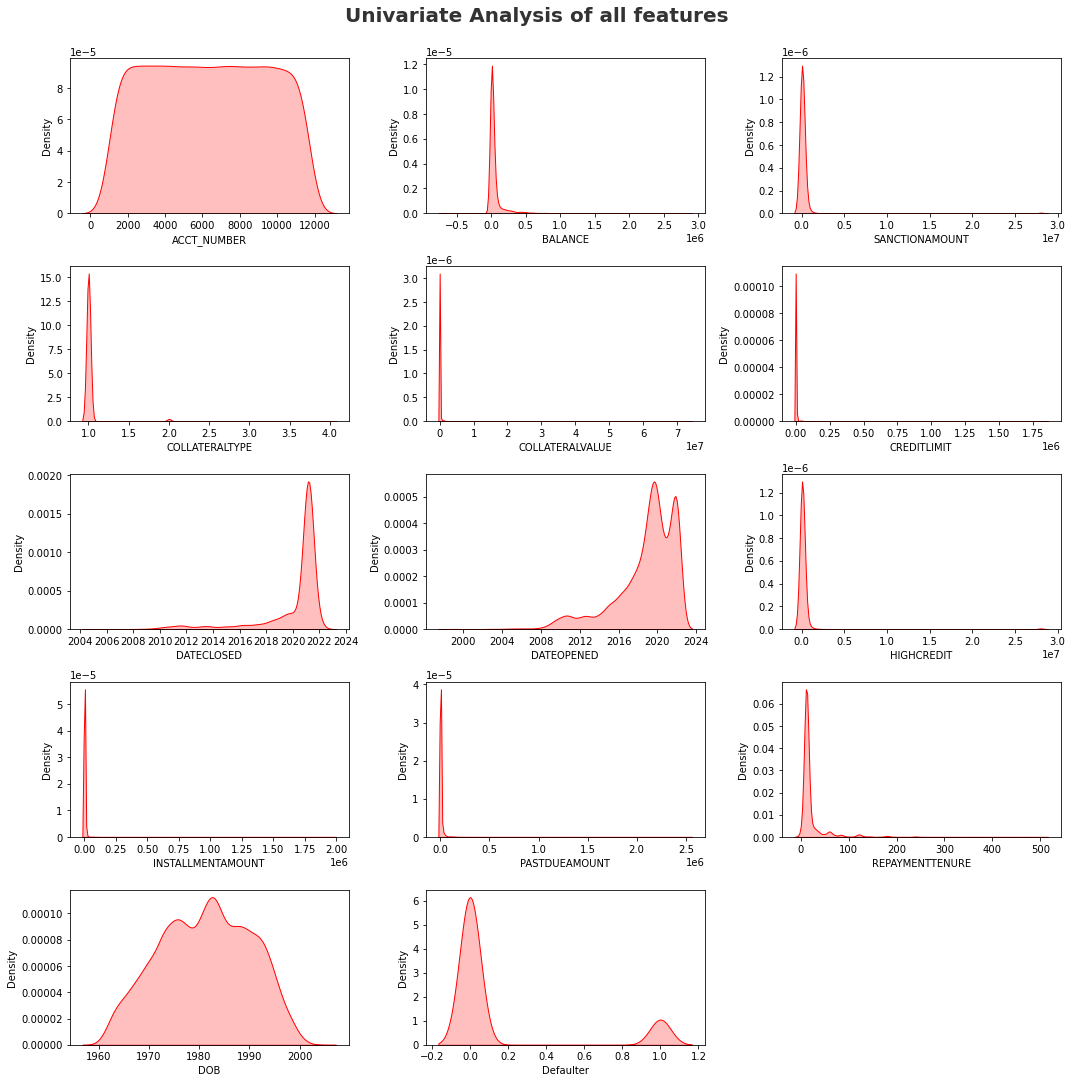

In [24]:
plt.figure(figsize = (15,15))
plt.suptitle('Univariate Analysis of all features', fontsize = 20, fontweight = "bold", alpha = 0.8, y = 1.)

for i in range(0, len(num_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(df[num_features[i]], shade =True, color='r')
    plt.xlabel(num_features[i])
    plt.tight_layout()

## Statistical Analysis

In [25]:
#Check the correlation
df.corr().T

,ACCT_NUMBER,BALANCE,SANCTIONAMOUNT,COLLATERALTYPE,COLLATERALVALUE,CREDITLIMIT,HIGHCREDIT,INSTALLMENTAMOUNT,PASTDUEAMOUNT,REPAYMENTTENURE,Defaulter
ACCT_NUMBER,1.000000,-0.081464,-0.042018,-0.013231,-0.018909,-0.023368,-0.040213,-0.021531,-0.032742,-0.089824,0.613521
BALANCE,-0.081464,1.000000,0.071259,0.004175,0.150146,0.095599,0.069709,0.078674,0.308737,0.466363,-0.116634
SANCTIONAMOUNT,-0.042018,0.071259,1.000000,-0.007999,0.016419,0.005585,0.999959,0.010730,0.020909,0.051753,-0.027720
COLLATERALTYPE,-0.013231,0.004175,-0.007999,1.000000,-0.001161,-0.006673,-0.008602,0.016588,-0.008049,-0.019693,-0.018452
COLLATERALVALUE,-0.018909,0.150146,0.016419,-0.001161,1.000000,0.007195,0.016079,0.022687,0.186733,0.160388,-0.026849
CREDITLIMIT,-0.023368,0.095599,0.005585,-0.006673,0.007195,1.000000,0.005297,0.005736,-0.002585,0.099302,-0.023423
HIGHCREDIT,-0.040213,0.069709,0.999959,-0.008602,0.016079,0.005297,1.000000,0.010406,0.020321,0.050216,-0.025247
INSTALLMENTAMOUNT,-0.021531,0.078674,0.010730,0.016588,0.022687,0.005736,0.010406,1.000000,0.020643,0.044183,-0.018192
PASTDUEAMOUNT,-0.032742,0.308737,0.020909,-0.008049,0.186733,-0.002585,0.020321,0.020643,1.000000,0.075439,-0.022608
REPAYMENTTENURE,-0.089824,0.466363,0.051753,-0.019693,0.160388,0.099302,0.050216,0.044183,0.075439,1.000000,-0.121461


# <font color=	Green>Multivariate Analysis<font>

## Heatmap of correlation

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'ACCT_NUMBER'),
  Text(1.5, 0, 'BALANCE'),
  Text(2.5, 0, 'SANCTIONAMOUNT'),
  Text(3.5, 0, 'COLLATERALTYPE'),
  Text(4.5, 0, 'COLLATERALVALUE'),
  Text(5.5, 0, 'CREDITLIMIT'),
  Text(6.5, 0, 'HIGHCREDIT'),
  Text(7.5, 0, 'INSTALLMENTAMOUNT'),
  Text(8.5, 0, 'PASTDUEAMOUNT'),
  Text(9.5, 0, 'REPAYMENTTENURE'),
  Text(10.5, 0, 'Defaulter')])

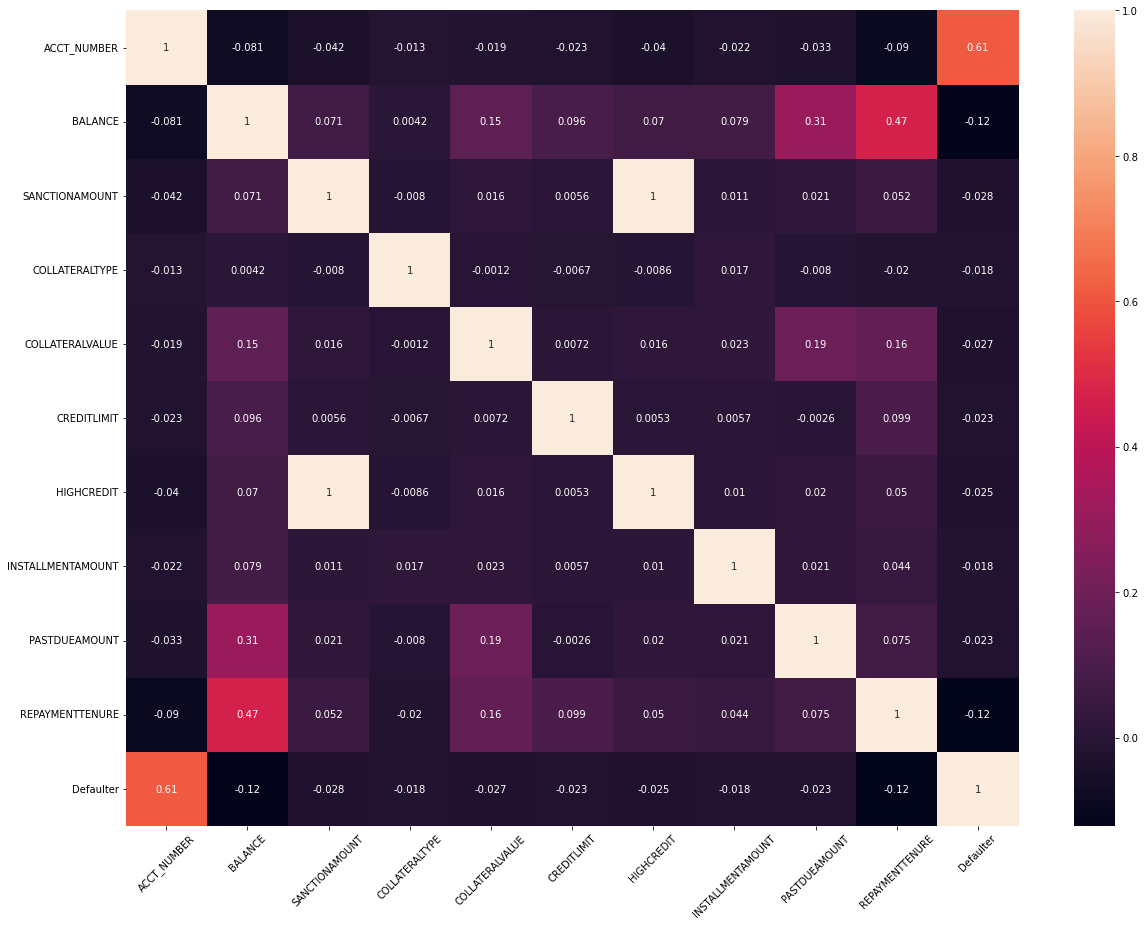

In [26]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),annot = True)
plt.xticks(rotation = 45)

In [27]:
df.columns

Index(['ACCT_NUMBER', 'BALANCE', 'SANCTIONAMOUNT', 'COLLATERALTYPE',
       'COLLATERALVALUE', 'CREDITLIMIT', 'DATECLOSED', 'DATEOPENED',
       'HIGHCREDIT', 'INSTALLMENTAMOUNT', 'PASTDUEAMOUNT', 'REPAYMENTTENURE',
       'TERMFREQUENCY', 'SELF_TRADE', 'SECTOR', 'DOB', 'Defaulter'],
      dtype='object')

# <font color=Green>Questions<font>

## How many accounts are defaulters

In [28]:
df["Defaulter"].value_counts()

0    9010
1    1541
Name: Defaulter, dtype: int64

<AxesSubplot:xlabel='Defaulter', ylabel='count'>

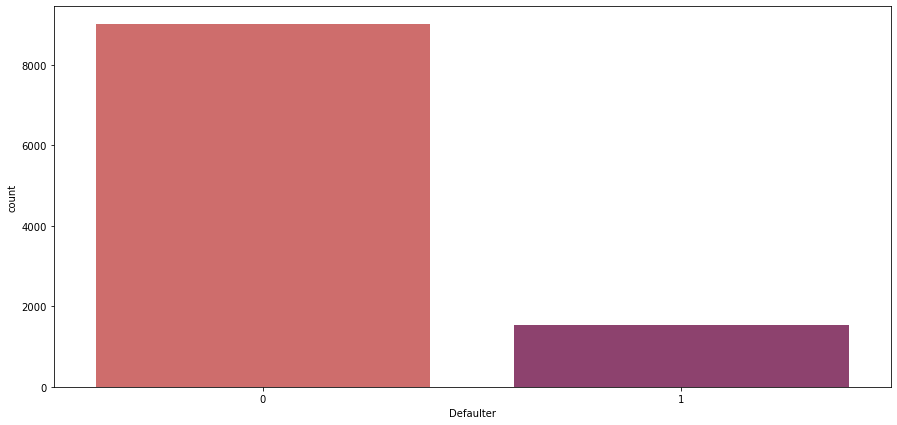

In [29]:
plt.figure(figsize = (15,7))
sns.countplot(df['Defaulter'],palette= "flare")

Total 1541 account are defaulters

## List of account numbers that are defaulters

In [30]:
df[df['Defaulter'] == 1]['ACCT_NUMBER']

9075     10099
9076     10100
9077     10101
9078     10102
9079     10103
         ...  
10670    11694
10671    11695
10672    11696
10673    11697
10674    11698
Name: ACCT_NUMBER, Length: 1541, dtype: int64

In [31]:
list_of_def_ACC = list(df[df['Defaulter'] == 1]['ACCT_NUMBER'])

In [32]:
list_of_def_ACC[:10]

[10099, 10100, 10101, 10102, 10103, 10104, 10105, 10106, 10107, 10108]

In [33]:
df.columns

Index(['ACCT_NUMBER', 'BALANCE', 'SANCTIONAMOUNT', 'COLLATERALTYPE',
       'COLLATERALVALUE', 'CREDITLIMIT', 'DATECLOSED', 'DATEOPENED',
       'HIGHCREDIT', 'INSTALLMENTAMOUNT', 'PASTDUEAMOUNT', 'REPAYMENTTENURE',
       'TERMFREQUENCY', 'SELF_TRADE', 'SECTOR', 'DOB', 'Defaulter'],
      dtype='object')

## What is the balance in defaulter accounts

In [34]:
df[df['Defaulter'] == 1][['ACCT_NUMBER','BALANCE']].sort_values(by = 'BALANCE',ascending = False)

,ACCT_NUMBER,BALANCE
10379,11403,550350.0
10230,11254,500377.0
9350,10374,500028.0
9349,10373,465533.0
10076,11100,342891.0
...,...,...
9640,10664,-5.0
9436,10460,-6.0
9316,10340,-7.0
10435,11459,-16.0


## What is the age of defaulter accounts

In [35]:
df[df['Defaulter'] == 1][['ACCT_NUMBER','BALANCE','DOB']]

,ACCT_NUMBER,BALANCE,DOB
9075,10099,0.0,1984-01-02
9076,10100,0.0,1984-01-02
9077,10101,0.0,1984-01-02
9078,10102,36.0,1984-01-02
9079,10103,0.0,1984-01-02
...,...,...,...
10670,11694,4810.0,1989-01-01
10671,11695,43346.0,1989-01-01
10672,11696,16524.0,1989-01-01
10673,11697,1648.0,1977-01-01


## Check the outliers

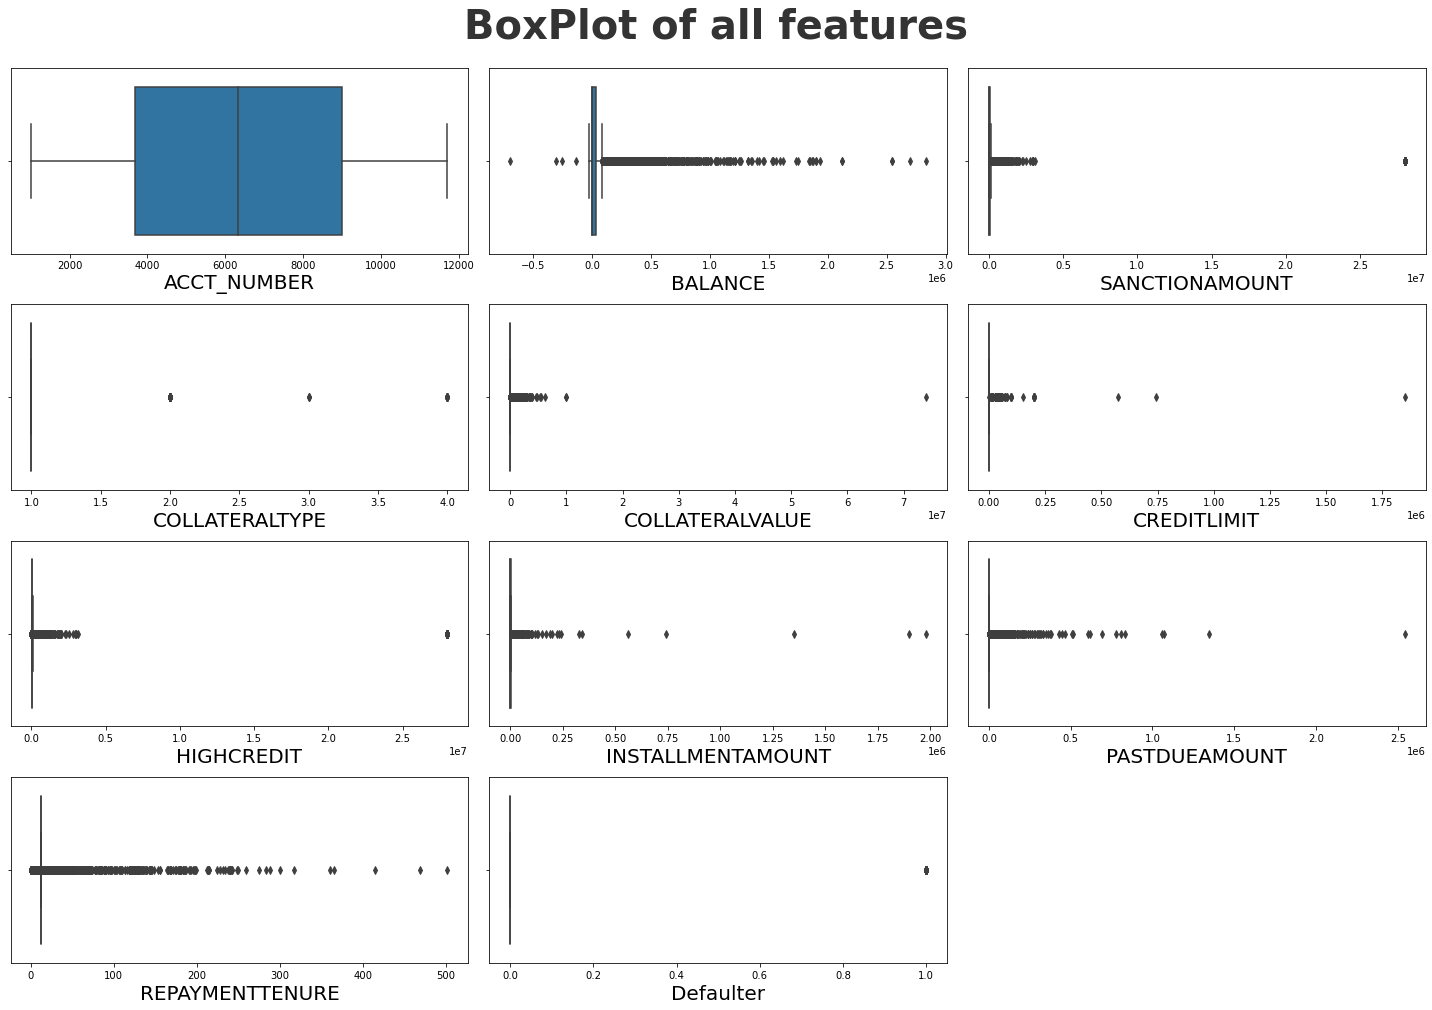

In [36]:
df1 = df.copy()
plt.figure(figsize = (20,20))
plt.suptitle('BoxPlot of all features', fontsize = 40, fontweight = "bold", alpha = 0.8, y = 1.)
columns_use = ['ACCT_NUMBER', 'BALANCE', 'SANCTIONAMOUNT', 'COLLATERALTYPE',
       'COLLATERALVALUE', 'CREDITLIMIT',
       'HIGHCREDIT', 'INSTALLMENTAMOUNT', 'PASTDUEAMOUNT', 'REPAYMENTTENURE', 'Defaulter']

for i in range(0, len(columns_use)):
    plt.subplot(6,3,i+1)
    sns.boxplot(x= df1[columns_use[i]], data = df1)
    plt.xlabel(columns_use[i],fontsize = 20)
    #plt.ylabel("Classes")
    #plt.title("{} .format(data.columns[i]))
    plt.tight_layout()

## Handling the outliers

In [37]:
def outlier_handling_function(data,column):
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    lower_fence = data[column].quantile(0.25) - (1.5 * IQR)
    higher_fence = data[column].quantile(0.75) + (1.5 * IQR)
    print(column, "---", "IQR --->",IQR)
    print("Lower Fence:",lower_fence)
    print("Higher Fence:", higher_fence)
    print("______________________________________________")
    data.loc[data[column] <=lower_fence, column] = lower_fence
    data.loc[data[column] >=higher_fence, column] = higher_fence

In [38]:
try:
    for columns in df1:
        outlier_handling_function(df1,columns)
        
except TypeError:
    print("Everything ok")

ACCT_NUMBER --- IQR ---> 5323.0
Lower Fence: -4312.0
Higher Fence: 16980.0
______________________________________________
BALANCE --- IQR ---> 34375.0
Lower Fence: -51562.5
Higher Fence: 85937.5
______________________________________________
SANCTIONAMOUNT --- IQR ---> 54000.0
Lower Fence: -65000.0
Higher Fence: 151000.0
______________________________________________
COLLATERALTYPE --- IQR ---> 0.0
Lower Fence: 1.0
Higher Fence: 1.0
______________________________________________
COLLATERALVALUE --- IQR ---> 0.0
Lower Fence: 0.0
Higher Fence: 0.0
______________________________________________
CREDITLIMIT --- IQR ---> 0.0
Lower Fence: 0.0
Higher Fence: 0.0
______________________________________________
DATECLOSED --- IQR ---> 386 days 12:00:00
Lower Fence: 2018-07-13 18:00:00
Higher Fence: 2022-10-06 18:00:00
______________________________________________
DATEOPENED --- IQR ---> 1251 days 00:00:00
Lower Fence: 2012-06-29 00:00:00
Higher Fence: 2026-03-12 00:00:00
________________________

## Before and After Handling of outliers

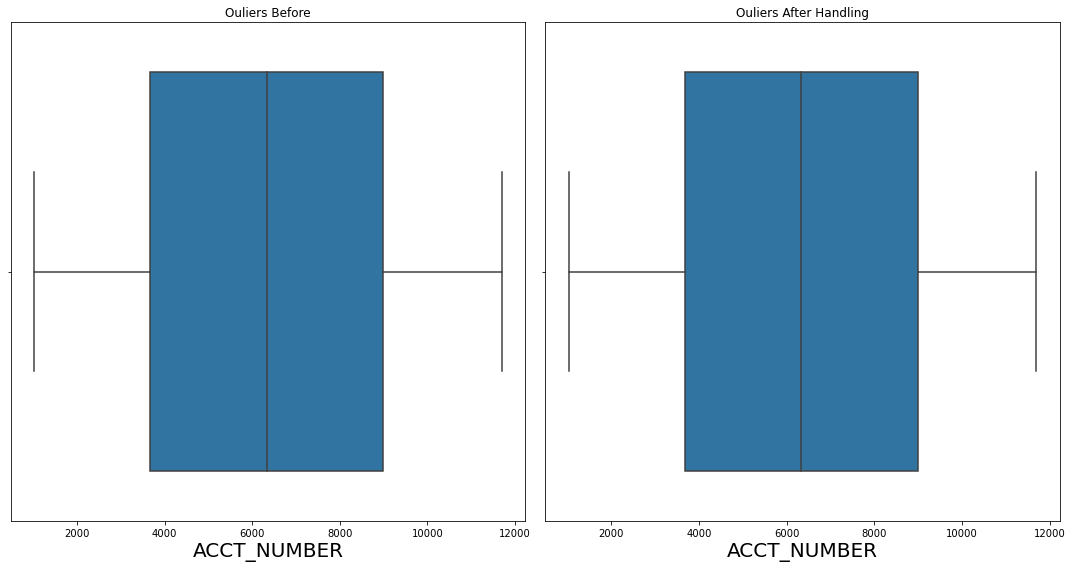

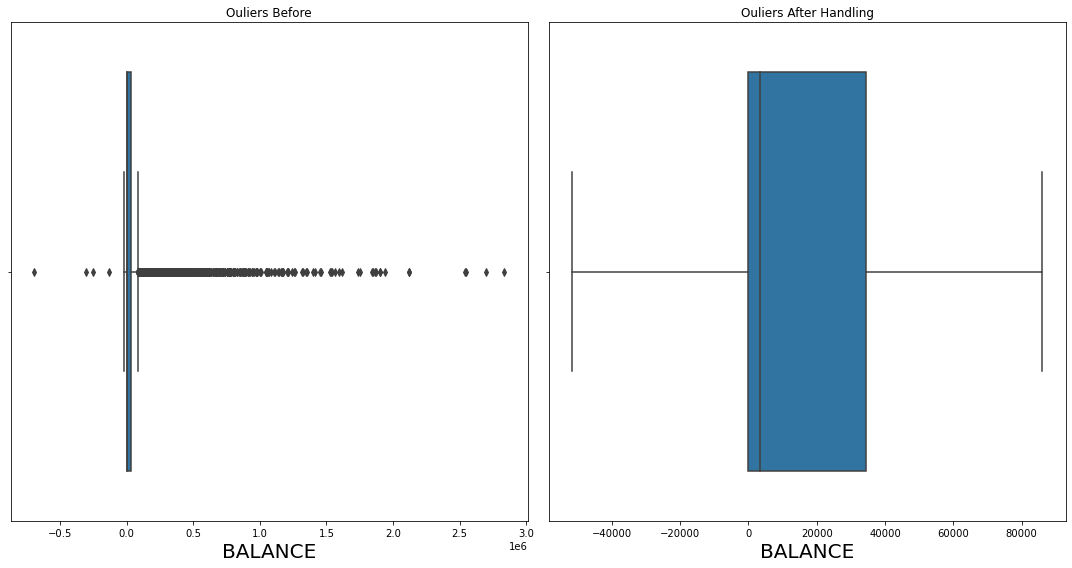

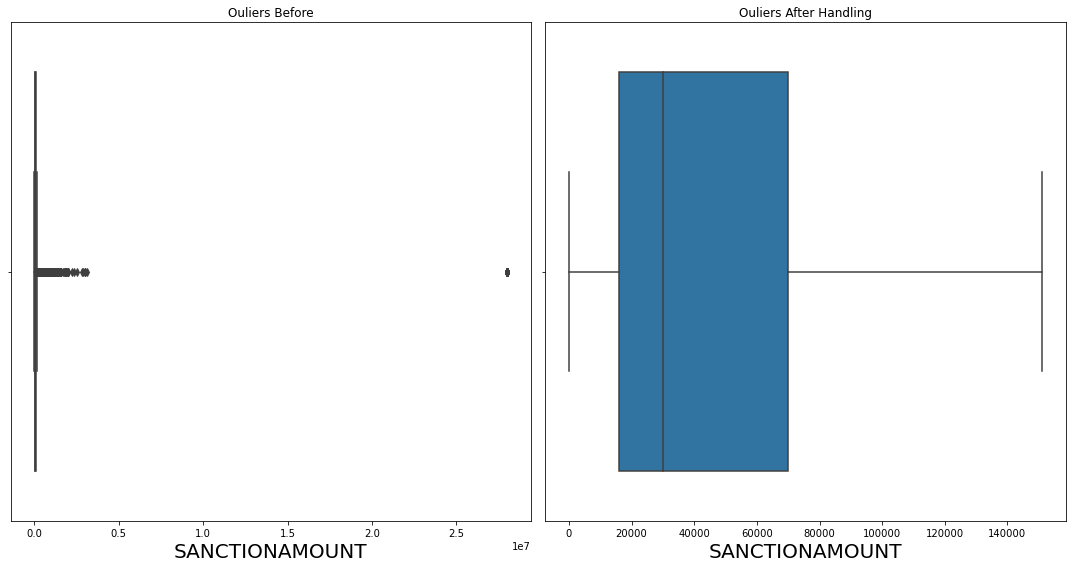

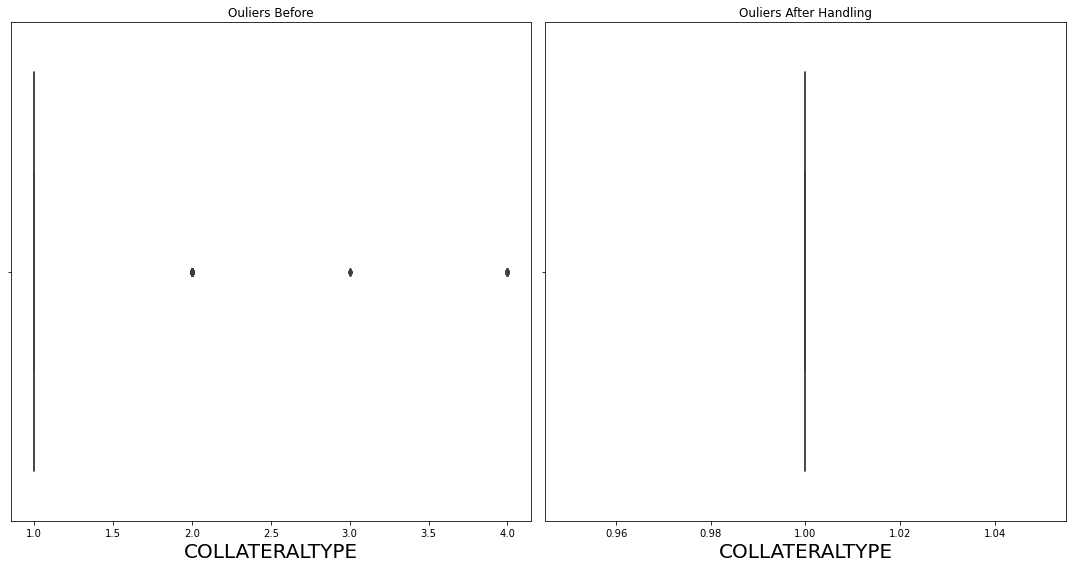

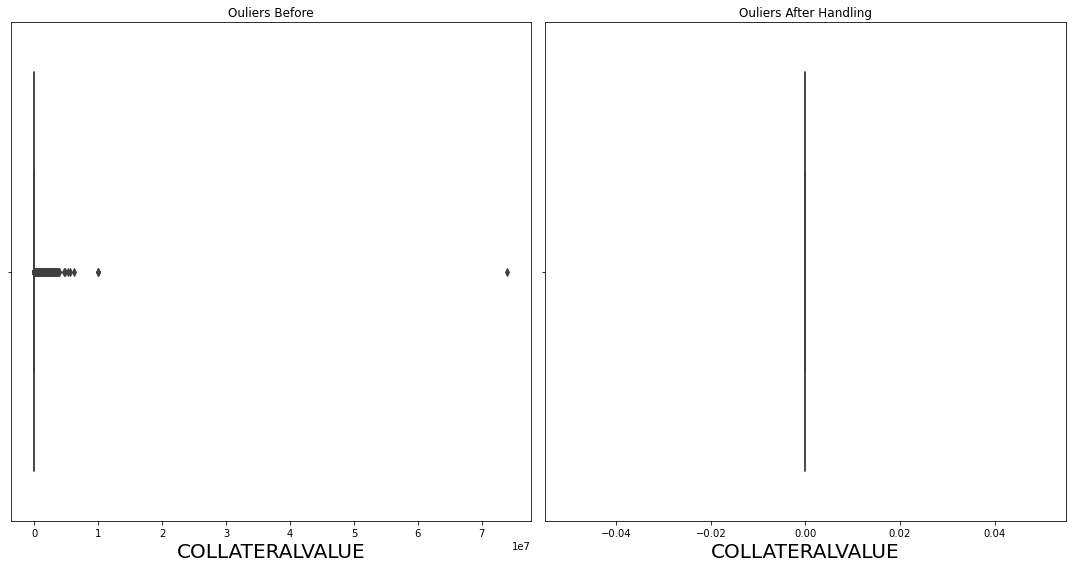

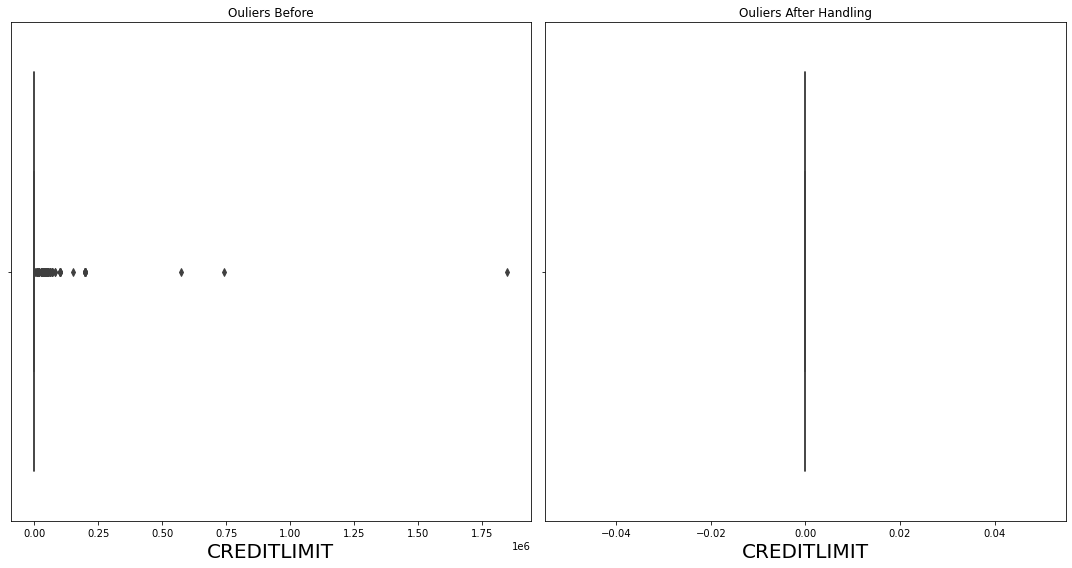

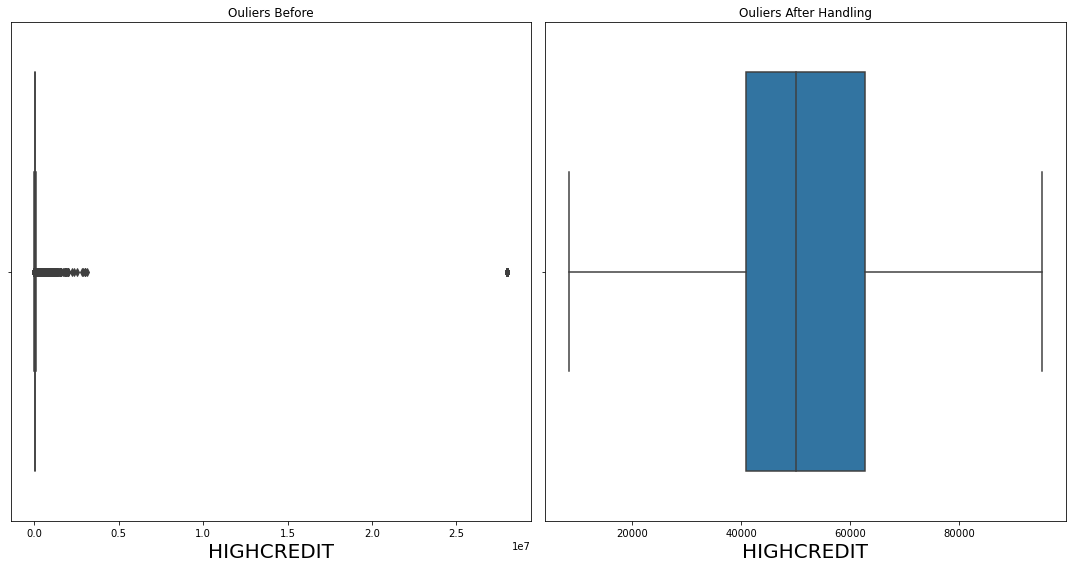

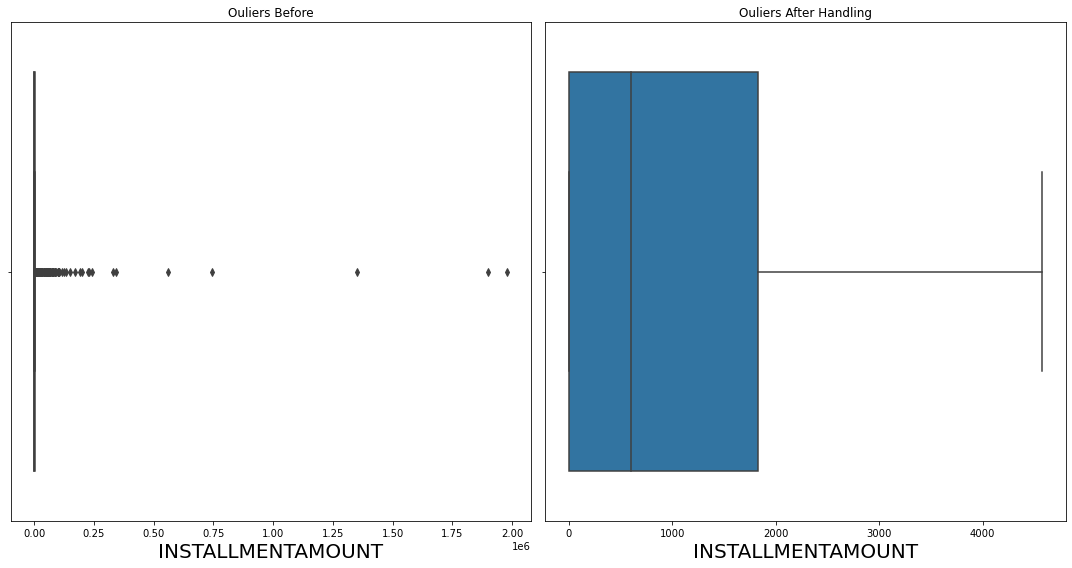

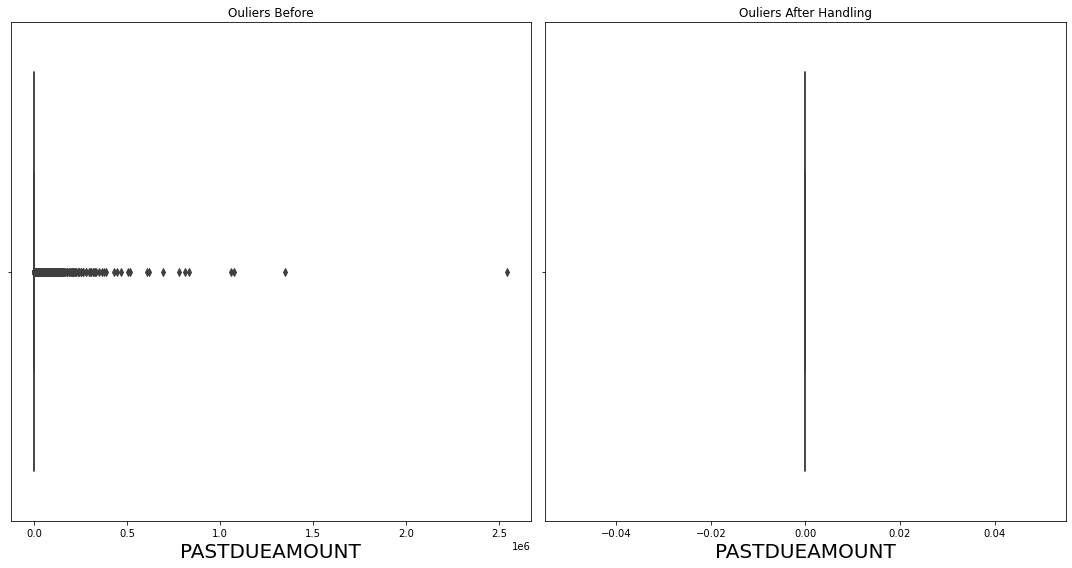

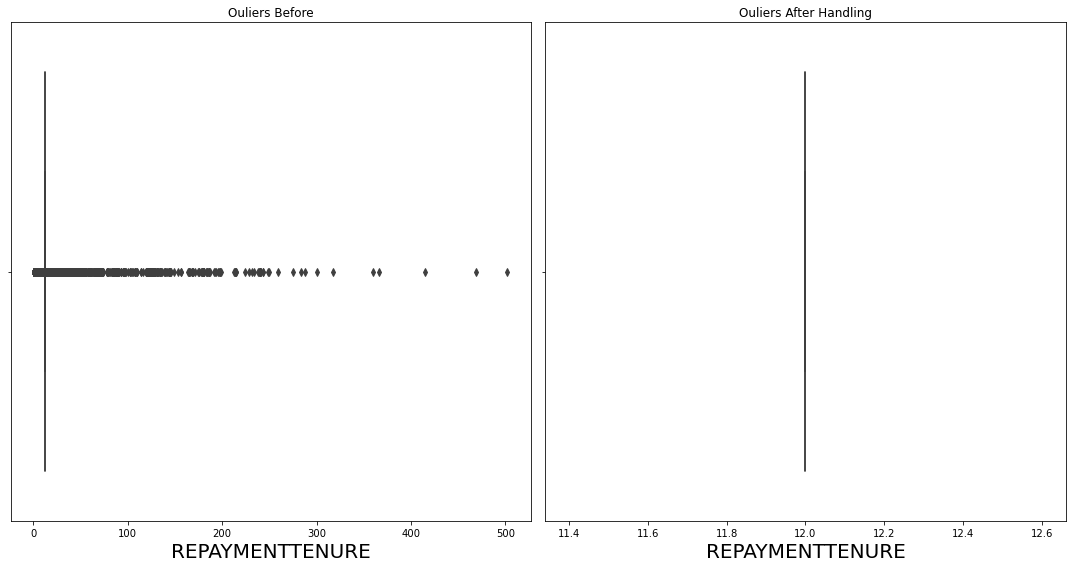

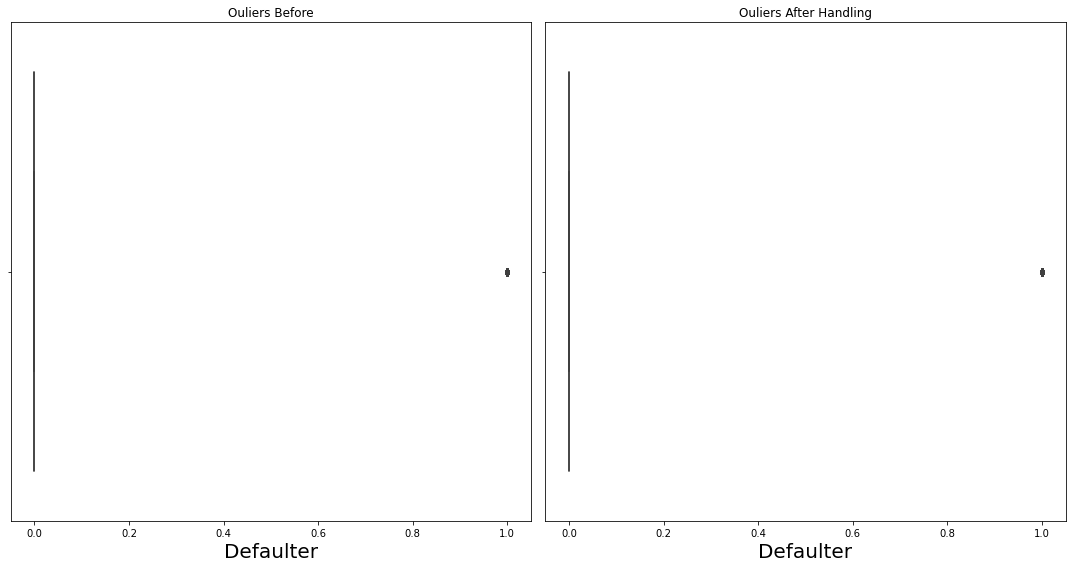

In [39]:
for i in range(0, len(columns_use)):
    plt.figure(figsize = (15,8))
    plt.subplot(121)
    sns.boxplot(x= df[columns_use[i]], data = df)
    plt.xlabel(columns_use[i],fontsize = 20)
    #plt.ylabel("Classes")
    #plt.title("{} .format(data.columns[i]))
    plt.title("Ouliers Before")
    plt.tight_layout()

    plt.subplot(122)
    sns.boxplot(x= df1[columns_use[i]], data = df1)
    plt.xlabel(columns_use[i],fontsize = 20)
    #plt.ylabel("Classes")
    #plt.title("{} .format(data.columns[i]))
    plt.title("Ouliers After Handling")
    plt.tight_layout()
    plt.show()

But we will keep the outliers, after checking the frequency we will decide

# Creating Independent and Dependent Features

In [40]:
df.columns

Index(['ACCT_NUMBER', 'BALANCE', 'SANCTIONAMOUNT', 'COLLATERALTYPE',
       'COLLATERALVALUE', 'CREDITLIMIT', 'DATECLOSED', 'DATEOPENED',
       'HIGHCREDIT', 'INSTALLMENTAMOUNT', 'PASTDUEAMOUNT', 'REPAYMENTTENURE',
       'TERMFREQUENCY', 'SELF_TRADE', 'SECTOR', 'DOB', 'Defaulter'],
      dtype='object')

In [41]:
X = df.drop(columns = ['Defaulter','DATECLOSED','DATEOPENED','DOB','TERMFREQUENCY','SELF_TRADE','SECTOR'])
y = df['Defaulter']

# List of Top 10 features with their importance value

In [42]:
df4 = pd.read_csv(r"C:\Users\M G ENGINEERING\preprocessed data.csv")
X1 = df4.drop(columns = ['Defaulter','DATECLOSED','DATEOPENED','DOB','TERMFREQUENCY','SELF_TRADE','SECTOR','BALANCE'])

In [43]:
ordered_rank_features=SelectKBest(score_func=chi2,k=10)
ordered_rank_features.fit(X1,y)
ordered_rank_features.fit(X1,y)
ordered_rank_features.scores_

array([7.07277758e+06, 5.92987586e+06, 1.72710560e+07, 0.00000000e+00,
                  nan,            nan, 3.97829879e+05, 1.39846473e+03,
                  nan, 0.00000000e+00])

In [73]:
df_scores=pd.DataFrame(ordered_rank_features.scores_,columns=["Scores"])
dfcolumns=pd.DataFrame(X.columns)
features_rank=pd.concat([dfcolumns,df_scores],axis=1)
features_rank.columns=["features","score"]
round(features_rank.sort_values(by = ['score'],ascending=False),2)

,features,score
2,SANCTIONAMOUNT,17271055.98
0,ACCT_NUMBER,7072777.58
1,BALANCE,5929875.86
6,HIGHCREDIT,397829.88
7,INSTALLMENTAMOUNT,1398.46
3,COLLATERALTYPE,0.00
9,REPAYMENTTENURE,0.00
4,COLLATERALVALUE,NaN
5,CREDITLIMIT,NaN
8,PASTDUEAMOUNT,NaN


## Independent feature

In [45]:
X.head()

,ACCT_NUMBER,BALANCE,SANCTIONAMOUNT,COLLATERALTYPE,COLLATERALVALUE,CREDITLIMIT,HIGHCREDIT,INSTALLMENTAMOUNT,PASTDUEAMOUNT,REPAYMENTTENURE
0,1024,0.0,50000,1.0,0.0,0.0,50000.0,1195.0,0.0,52.0
1,1025,71704.0,80000,1.0,0.0,0.0,80000.0,4146.0,0.0,24.0
2,1026,0.0,15000,1.0,0.0,0.0,50000.0,358.0,0.0,12.0
3,1027,0.0,20000,1.0,0.0,0.0,50000.0,907.0,0.0,12.0
4,1028,21795.0,21795,1.0,0.0,0.0,50000.0,604.0,0.0,12.0


In [46]:
X.shape

(10551, 10)

## Dependent feature

In [47]:
y.shape

(10551,)

In [48]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Defaulter, dtype: int64

# <font color=Green>Importing sklearn libraries for machine learning<font>

In [49]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import  LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

# <font color=Green>Train Test Split<font>

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [51]:
X_train.shape,y_train.shape

((7913, 10), (7913,))

In [52]:
X_test.shape,y_test.shape

((2638, 10), (2638,))

# <font color=Green>Logistic Regression Model Training<font>

In [53]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [54]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [55]:
classifier_regressor_bal=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

## Standarizing or Feature Scaling

In [56]:
classifier_regressor_bal.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [57]:
print(classifier_regressor_bal.best_params_)

{'C': 2, 'max_iter': 200, 'penalty': 'l2'}


In [58]:
print(classifier_regressor_bal.best_score_)

0.9533687177205981


# <font color=Green>Prediction<font>

In [59]:
y_bal_pred = classifier_regressor_bal.predict(X_test)
y_bal_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

# <font color=Green>Accuracy<font>

In [60]:
from sklearn.metrics import accuracy_score,classification_report
bal_score = accuracy_score(y_bal_pred,y_test)
print(bal_score)

0.954510993176649


# <font color=Green>Classification Report<font>

In [61]:
print(classification_report(y_bal_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2244
           1       0.86      0.83      0.84       394

    accuracy                           0.95      2638
   macro avg       0.92      0.90      0.91      2638
weighted avg       0.95      0.95      0.95      2638



# <font color=Green>Performance Metrix<font>

# <font color=Green>Confusion Metrix<font>

In [62]:
conf_mat_bal=confusion_matrix(y_bal_pred,y_test)
conf_mat_bal

array([[2192,   52],
       [  68,  326]], dtype=int64)

In [63]:
true_positive = conf_mat_bal[0][0]
false_positive = conf_mat_bal[0][1]
false_negative = conf_mat_bal[1][0]
true_negative = conf_mat_bal[1][1]
print('true_positive:',true_positive)
print('false_positive:',false_positive)
print('true_negative:',true_negative)
print('false_negative:',false_negative)

true_positive: 2192
false_positive: 52
true_negative: 326
false_negative: 68


# <font color=Green>Precision<font>

In [64]:
bal_Precision = true_positive/(true_positive+false_positive)
bal_Precision

0.9768270944741533

# <font color=Green>Recall<font>

In [65]:
bal_recall = true_positive/(true_positive+false_negative)
bal_recall

0.9699115044247788

# <font color=Green>F1-Score<font>

In [66]:
F1_Score_bal = 2*(bal_recall * bal_Precision) / (bal_recall + bal_Precision)
F1_Score_bal

0.9733570159857904

In [67]:
print(classification_report(y_bal_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2244
           1       0.86      0.83      0.84       394

    accuracy                           0.95      2638
   macro avg       0.92      0.90      0.91      2638
weighted avg       0.95      0.95      0.95      2638



# <font color=Green>AUC<font>

In [68]:
auc = roc_auc_score(y_bal_pred, y_test)
print("Area under curve of original dataset",auc)

Area under curve of original dataset 0.9021191309934219


In [69]:
i_report = []
i_report.append(["Accuracy",bal_score])
i_report.append(["Precision",bal_Precision])
i_report.append(["Recall",bal_recall])
i_report.append(["F1-Score",F1_Score_bal])
i_report.append(["AUC", auc])

In [70]:
Report = pd.DataFrame(i_report,columns= ['Particulars','values'])
Report

,Particulars,values
0,Accuracy,0.954511
1,Precision,0.976827
2,Recall,0.969912
3,F1-Score,0.973357
4,AUC,0.902119
